In [137]:
import ccxt
import re
import json
import os
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib import rcParams

In [3]:

ccxt.exchanges

['ace',
 'alpaca',
 'ascendex',
 'bequant',
 'bigone',
 'binance',
 'binancecoinm',
 'binanceus',
 'binanceusdm',
 'bit2c',
 'bitbank',
 'bitbay',
 'bitbns',
 'bitcoincom',
 'bitfinex',
 'bitfinex2',
 'bitflyer',
 'bitforex',
 'bitget',
 'bithumb',
 'bitmart',
 'bitmex',
 'bitopro',
 'bitpanda',
 'bitrue',
 'bitso',
 'bitstamp',
 'bitstamp1',
 'bittrex',
 'bitvavo',
 'bkex',
 'bl3p',
 'blockchaincom',
 'btcalpha',
 'btcbox',
 'btcex',
 'btcmarkets',
 'btctradeua',
 'btcturk',
 'bybit',
 'cex',
 'coinbase',
 'coinbaseprime',
 'coinbasepro',
 'coincheck',
 'coinex',
 'coinfalcon',
 'coinmate',
 'coinone',
 'coinsph',
 'coinspot',
 'cryptocom',
 'currencycom',
 'delta',
 'deribit',
 'digifinex',
 'exmo',
 'fmfwio',
 'gate',
 'gateio',
 'gemini',
 'hitbtc',
 'hitbtc3',
 'hollaex',
 'huobi',
 'huobijp',
 'huobipro',
 'idex',
 'independentreserve',
 'indodax',
 'kraken',
 'krakenfutures',
 'kucoin',
 'kucoinfutures',
 'kuna',
 'latoken',
 'lbank',
 'lbank2',
 'luno',
 'lykke',
 'mercado',
 '

In [6]:
futures, spot = 'futures', 'spot'
symbols = [
    "BTC/USDT",
    "LTC/USDT",
    "DOGE/USDT",
    "SHIB/USDT",
    "SOL/USDT",
    "ETH/USDT",
    "ADA/USDT",
    "DOT/USDT",
    "UNI/USDT",
    "LINK/USDT",
]

### Single exchange pairs 

In [15]:
exchange_id = 'binance'
exchange_class = getattr(ccxt, exchange_id)
exchange = exchange_class({
    'apiKey': 'EuB17NsXPH3AnK6yBMSZkHxsX4wIJwVKTsVJDft0RrwJmWpEE3KLbucacKkoThFx',
    # 'secret': 'YOUR_SECRET',
})
# exchange.load_markets()
markets = exchange.load_markets()
# markets
all_symbols = [v['symbol'] for v in markets.values()]

In [144]:
# len(all_symbols), all_symbols
quote_1 = 'BTC'
quote_2 = 'ETH'
base = 'ETH/BTC'

def get_symbols(base, quote_1, quote_2):
    q1_symbols = [s for s in all_symbols if re.match(f'^\w+/{quote_1}$', s) ]
    q2_symbols = [s for s in all_symbols if re.match(f'^\w+/{quote_2}$', s) ]
    csym_1 = [re.sub(f'/{quote_1}', '', s) for s in q1_symbols if not s.startswith(quote_2)]
    csym_2 = [re.sub(f'/{quote_2}', '', s) for s in q2_symbols if not s.startswith(quote_1)]
    csyms = set(csym_1).intersection(set(csym_2))
# set(csym_1).difference(set(csym_2))
    return csyms, q1_symbols, q2_symbols
# b_symbols = [s for s in all_symbols if re.match(f'\w+/{base}', s) ]
csyms, q1_symbols, q2_symbols = get_symbols(base, quote_1, quote_2)
csyms

{'AAVE',
 'ADA',
 'ADX',
 'AE',
 'AGI',
 'AION',
 'ALGO',
 'AMB',
 'APE',
 'APPC',
 'APT',
 'ARDR',
 'ARK',
 'ARN',
 'ARPA',
 'AST',
 'ASTR',
 'ATOM',
 'AVAX',
 'AXS',
 'BAT',
 'BCC',
 'BCD',
 'BCN',
 'BCPT',
 'BEL',
 'BETA',
 'BLZ',
 'BNB',
 'BNT',
 'BOND',
 'BQX',
 'BRD',
 'BTG',
 'BTS',
 'CDT',
 'CELR',
 'CHAT',
 'CHR',
 'CLOAK',
 'CMT',
 'CND',
 'CRV',
 'CVC',
 'DAR',
 'DASH',
 'DATA',
 'DENT',
 'DGD',
 'DLT',
 'DNT',
 'DOCK',
 'DOT',
 'DYDX',
 'EASY',
 'EDO',
 'EGLD',
 'ELF',
 'ENG',
 'ENJ',
 'EOS',
 'ETC',
 'EVX',
 'EZ',
 'FARM',
 'FIL',
 'FIRO',
 'FRONT',
 'FTM',
 'FTT',
 'FUEL',
 'FUN',
 'GAL',
 'GALA',
 'GLM',
 'GMT',
 'GNT',
 'GRS',
 'GRT',
 'GTO',
 'GVT',
 'GXS',
 'HC',
 'HOT',
 'HSR',
 'ICN',
 'ICP',
 'ICX',
 'INS',
 'IOST',
 'IOTA',
 'IOTX',
 'JASMY',
 'KAVA',
 'KEY',
 'KMD',
 'KNC',
 'KSM',
 'LEND',
 'LINK',
 'LIT',
 'LOOM',
 'LRC',
 'LSK',
 'LTC',
 'LUN',
 'LUNA',
 'MANA',
 'MATIC',
 'MCO',
 'MDA',
 'MFT',
 'MOD',
 'MTH',
 'MTL',
 'NANO',
 'NAS',
 'NAV',
 'NCASH',
 'NEAR

### Download the data

In [113]:
timeframe = '30m'
type = 'spot'
folder = f'data/{exchange_id}/{type}/{timeframe}'
for symbol in [base] + q1_symbols + q2_symbols:
    fsymbol = symbol.replace('/', '_')
    # print(fsymbol)
    if not os.path.exists(folder): os.makedirs(folder)
    filename = f'{folder}/{fsymbol}-{timeframe}.json'
    if not os.path.exists(filename):
        print(f'Fetching {symbol} to {filename} ...')
        ohlcv = exchange.fetch_ohlcv(symbol, timeframe)
        with open(filename, 'w') as outfile:
            outfile.write(json.dumps(ohlcv))

Fetching ETH/BTC to data/binance/spot/30m/ETH_BTC-30m.json ...
Fetching LTC/BTC to data/binance/spot/30m/LTC_BTC-30m.json ...
Fetching BNB/BTC to data/binance/spot/30m/BNB_BTC-30m.json ...
Fetching NEO/BTC to data/binance/spot/30m/NEO_BTC-30m.json ...
Fetching BCC/BTC to data/binance/spot/30m/BCC_BTC-30m.json ...
Fetching GAS/BTC to data/binance/spot/30m/GAS_BTC-30m.json ...
Fetching HSR/BTC to data/binance/spot/30m/HSR_BTC-30m.json ...
Fetching MCO/BTC to data/binance/spot/30m/MCO_BTC-30m.json ...
Fetching WTC/BTC to data/binance/spot/30m/WTC_BTC-30m.json ...
Fetching LRC/BTC to data/binance/spot/30m/LRC_BTC-30m.json ...
Fetching QTUM/BTC to data/binance/spot/30m/QTUM_BTC-30m.json ...
Fetching YOYOW/BTC to data/binance/spot/30m/YOYOW_BTC-30m.json ...
Fetching OMG/BTC to data/binance/spot/30m/OMG_BTC-30m.json ...
Fetching ZRX/BTC to data/binance/spot/30m/ZRX_BTC-30m.json ...
Fetching STRAT/BTC to data/binance/spot/30m/STRAT_BTC-30m.json ...
Fetching SNGLS/BTC to data/binance/spot/30m/S

### Compare prices

In [122]:
# Load all symbols into a single dataframe

def load_sym(csym):
    symq_1,sym_2 = f'{csym}/{quote_1}', f'{csym}/{quote_2}'
    fsym_1, fsym_2, f_base = [s.replace('/', '_') for s in [symq_1,sym_2, base]]
    file_sym_1, file_sym_2, file_base = [f'{folder}/{fsymbol}-{timeframe}.json' for fsymbol in [fsym_1,fsym_2, f_base]]

    # Load 3 dataframes
    df_sym1, df_sym2, df_base = [pd.read_json(f) for f in [file_sym_1, file_sym_2, file_base]]
    for df in [df_sym1, df_sym2, df_base]:
        df.columns = ['ts', 'o', 'h', 'l', 'c', 'v']
        df.set_index(pd.DatetimeIndex(pd.to_datetime(df['ts'], unit='ms', utc=False)), inplace=True, drop=True)

    # Calculate differences
    df = df_base.join(df_sym1, rsuffix='_q1').join(df_sym2, rsuffix='_q2')
    df['csym'] = csym
    df['c_q1_calc'] = df.c_q2 * df.c 
    df['c_q1_diff'] = df.c_q1 - df.c_q1_calc
    df['perc_c_q1_diff'] = df.c_q1_diff / df.c_q1 * 100
    df['perc_diff_abs'] = df.perc_c_q1_diff.abs()

    return df

df = pd.concat([load_sym(csym) for csym in csyms])

In [128]:

filter = df.perc_diff_abs > 0.4
# filter = df.c_q1 / df.c != df.c_calc
fdf = df[filter][['csym', 'c', 'c_q1', 'c_q2','c_q1_calc', 'c_q1_diff', 'perc_c_q1_diff', 'perc_diff_abs']]
fdf

,csym,c,c_q1,c_q2,c_q1_calc,c_q1_diff,perc_c_q1_diff,perc_diff_abs
ts,,,,,,,,
2023-05-14 17:00:00,AAVE,0.067072,0.002328,0.034900,0.002341,-0.000013,-0.550378,0.550378
2023-05-15 17:00:00,AAVE,0.066721,0.002319,0.034600,0.002309,0.000010,0.450772,0.450772
2023-05-16 05:00:00,AAVE,0.066861,0.002316,0.034500,0.002307,0.000009,0.401360,0.401360
2023-05-16 20:00:00,AAVE,0.067476,0.002311,0.034100,0.002301,0.000010,0.435673,0.435673
2023-05-17 13:30:00,AAVE,0.067241,0.002343,0.034700,0.002333,0.000010,0.415591,0.415591
...,...,...,...,...,...,...,...,...
2023-05-23 15:00:00,SSV,0.067990,0.000868,0.012701,0.000864,0.000005,0.536629,0.536629
2023-05-24 08:30:00,SSV,0.067980,0.000866,0.012652,0.000860,0.000006,0.729114,0.729114
2023-05-24 10:00:00,SSV,0.067900,0.000877,0.012852,0.000873,0.000005,0.518605,0.518605


<Axes: >

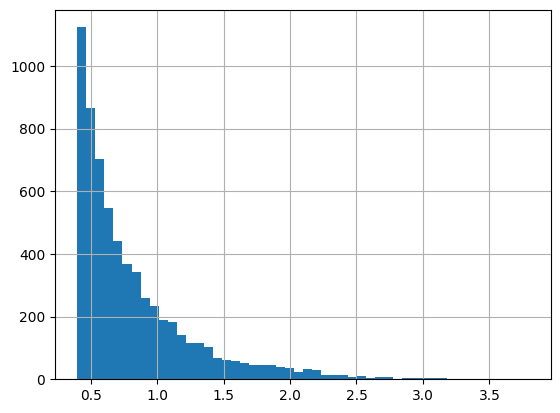

In [129]:
fdf.perc_diff_abs.hist(bins=50)

<Axes: xlabel='csym', ylabel='perc_diff_abs'>

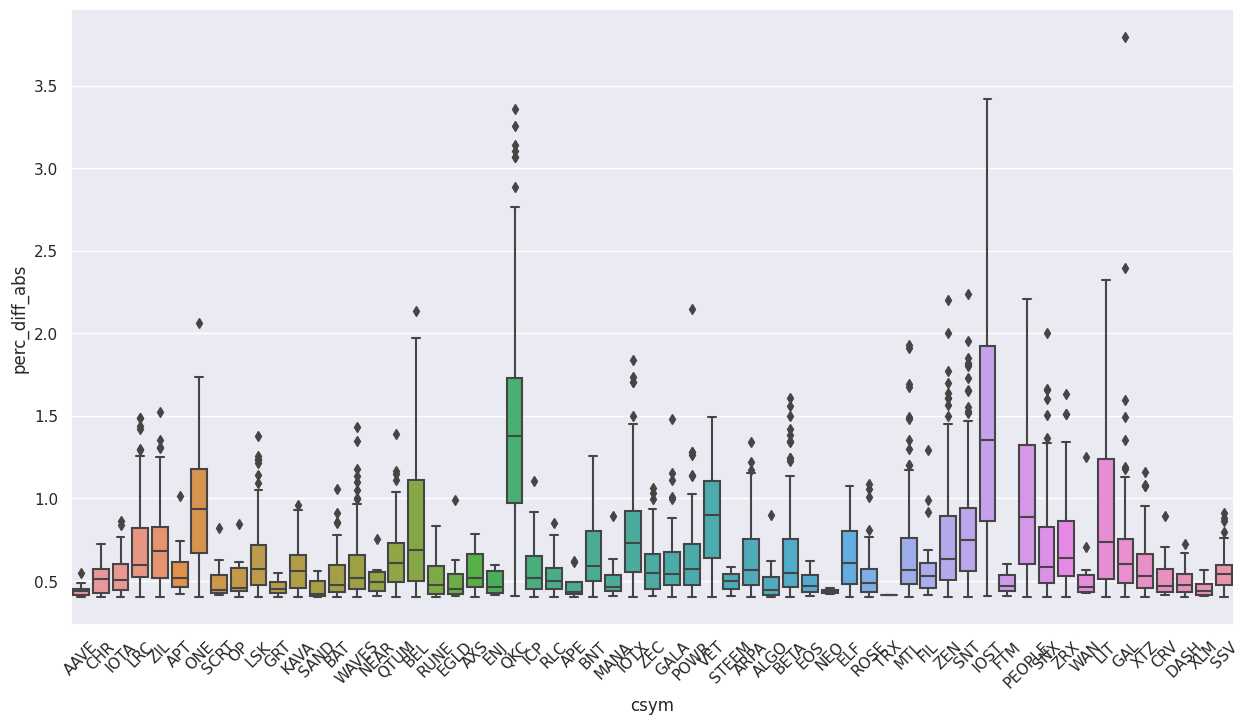

In [141]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xticks(rotation=45)
sns.boxplot(x='csym', y='perc_diff_abs', data=fdf)

In [119]:
# Load dataframes from files

csym = 'AAVE'
symq_1,sym_2 = f'{csym}/{quote_1}', f'{csym}/{quote_2}'
fsym_1, fsym_2, f_base = [s.replace('/', '_') for s in [symq_1,sym_2, base]]
file_sym_1, file_sym_2, file_base = [f'{folder}/{fsymbol}-{timeframe}.json' for fsymbol in [fsym_1,fsym_2, f_base]]


df_sym1, df_sym2, df_base = [pd.read_json(f) for f in [file_sym_1, file_sym_2, file_base]]
for df in [df_sym1, df_sym2, df_base]:
    # df.set_axis(['ts', 'o', 'h', 'l', 'c', 'v'], axis=1)
    df.columns = ['ts', 'o', 'h', 'l', 'c', 'v']
    # df['date'] = pd.to_datetime(df['ts'], unit='ms', utc=False)
    df.set_index(pd.DatetimeIndex(pd.to_datetime(df['ts'], unit='ms', utc=False)), inplace=True, drop=True)
df_sym1

,ts,o,h,l,c,v
ts,,,,,,
2023-05-14 13:30:00,1684071000000,0.002331,0.002334,0.002329,0.002333,95.814
2023-05-14 14:00:00,1684072800000,0.002332,0.002333,0.002329,0.002332,97.941
2023-05-14 14:30:00,1684074600000,0.002333,0.002333,0.002329,0.002329,19.077
2023-05-14 15:00:00,1684076400000,0.002328,0.002332,0.002320,0.002329,223.886
2023-05-14 15:30:00,1684078200000,0.002330,0.002337,0.002329,0.002334,199.366
...,...,...,...,...,...,...
2023-05-24 21:00:00,1684962000000,0.002422,0.002436,0.002420,0.002434,395.232
2023-05-24 21:30:00,1684963800000,0.002433,0.002435,0.002427,0.002430,858.197
2023-05-24 22:00:00,1684965600000,0.002429,0.002431,0.002429,0.002431,276.988


In [120]:
# Find historical arbitrage
# quote_1 = 'BTC'
# quote_2 = 'ETH'
# base = 'ETH/BTC'

df = df_base.join(df_sym1, rsuffix='_q1').join(df_sym2, rsuffix='_q2')
df['c_q1_calc'] = df.c_q2 * df.c 
df['c_q1_diff'] = df.c_q1 - df.c_q1_calc
df['perc_c_q1_diff'] = df.c_q1_diff / df.c_q1 * 100
df['perc_diff_abs'] = df.perc_c_q1_diff.abs()
filter = df.perc_diff_abs > 0.3
# filter = df.c_q1 / df.c != df.c_calc
df[filter][['c', 'c_q1', 'c_q2','c_q1_calc', 'c_q1_diff', 'perc_c_q1_diff', 'perc_diff_abs']]

,c,c_q1,c_q2,c_q1_calc,c_q1_diff,perc_c_q1_diff,perc_diff_abs
ts,,,,,,,
2023-05-14 17:00:00,0.067072,0.002328,0.0349,0.002341,-0.000013,-0.550378,0.550378
2023-05-14 19:30:00,0.066844,0.002312,0.0347,0.002319,-0.000007,-0.323824,0.323824
2023-05-15 08:00:00,0.066734,0.002318,0.0346,0.002309,0.000009,0.388421,0.388421
2023-05-15 17:00:00,0.066721,0.002319,0.0346,0.002309,0.000010,0.450772,0.450772
2023-05-16 05:00:00,0.066861,0.002316,0.0345,0.002307,0.000009,0.401360,0.401360
2023-05-16 12:30:00,0.067210,0.002304,0.0344,0.002312,-0.000008,-0.348264,0.348264
2023-05-16 13:00:00,0.067189,0.002304,0.0344,0.002311,-0.000007,-0.316910,0.316910
2023-05-16 20:00:00,0.067476,0.002311,0.0341,0.002301,0.000010,0.435673,0.435673
2023-05-16 20:30:00,0.067575,0.002313,0.0341,0.002304,0.000009,0.375811,0.375811


<Axes: >

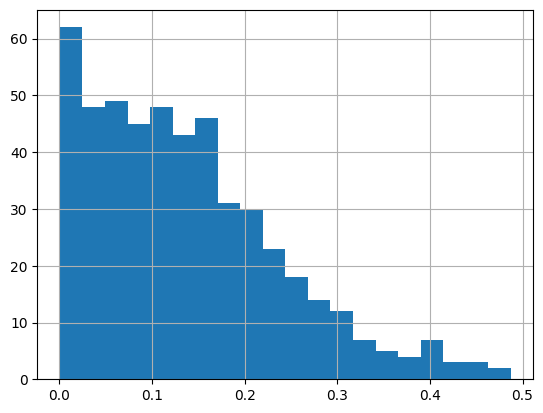

In [108]:
df.perc_diff_abs.hist(bins=20)

In [109]:
df[['perc_diff_abs']].describe()

,perc_diff_abs
count,500.000000
mean,0.138683
std,0.102688
min,0.000521
25%,0.056703
50%,0.121139
75%,0.198013
max,0.487338


In [ ]:
symbol, timeframe = 'SOL/USDT', '15m'
ohlcv = exchange.fetch_ohlcv(symbol, timeframe)
ohlcv

In [30]:
ohlcv

[[1684512900000, 20.4, 20.45, 20.39, 20.43, 15451.3],
 [1684513800000, 20.42, 20.42, 20.37, 20.42, 11773.02],
 [1684514700000, 20.42, 20.42, 20.4, 20.4, 11013.29],
 [1684515600000, 20.4, 20.42, 20.4, 20.41, 10872.2],
 [1684516500000, 20.4, 20.46, 20.4, 20.45, 10397.89],
 [1684517400000, 20.45, 20.49, 20.43, 20.48, 7984.42],
 [1684518300000, 20.48, 20.51, 20.47, 20.48, 9576.54],
 [1684519200000, 20.48, 20.51, 20.48, 20.48, 8941.64],
 [1684520100000, 20.49, 20.49, 20.43, 20.44, 19072.14],
 [1684521000000, 20.44, 20.46, 20.42, 20.45, 9464.14],
 [1684521900000, 20.45, 20.46, 20.42, 20.43, 6294.55],
 [1684522800000, 20.43, 20.43, 20.4, 20.4, 7316.85],
 [1684523700000, 20.4, 20.41, 20.31, 20.35, 23821.6],
 [1684524600000, 20.34, 20.37, 20.33, 20.34, 11320.33],
 [1684525500000, 20.33, 20.38, 20.32, 20.37, 12425.65],
 [1684526400000, 20.37, 20.4, 20.34, 20.39, 8234.81],
 [1684527300000, 20.39, 20.39, 20.35, 20.37, 8443.73],
 [1684528200000, 20.36, 20.37, 20.32, 20.35, 6814.47],
 [1684529100000

In [31]:
s = 'EOS/ETH'
s.replace('/', '_')

'EOS_ETH'